In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1.IMPORTING DATA SET

In [3]:


# Load the dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')


2.BASIC INFO

In [4]:
# Overview of the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# First few rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
# Summary statistics
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


3.CHECKING FOR NULL VALUES

In [7]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

4. CONVERT DATE COLUMNS

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


5. SALES &  PROFIT CATEGORY

In [9]:
df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)



,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


6.TOP 10 PRODUCTS BY SALES


In [10]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


7. SALES BY REGION AND SATE

In [11]:
df.groupby(['Region', 'State'])['Sales'].sum().sort_values(ascending=False)


Region   State               
West     California              457687.6315
East     New York                310876.2710
Central  Texas                   170188.0458
West     Washington              138641.2700
East     Pennsylvania            116511.9140
South    Florida                  89473.7080
Central  Illinois                 80166.1010
East     Ohio                     78258.1360
Central  Michigan                 76269.6140
South    Virginia                 70636.7200
         North Carolina           55603.1640
Central  Indiana                  53555.3600
South    Georgia                  49095.8400
         Kentucky                 36591.7500
East     New Jersey               35764.3120
West     Arizona                  35282.0010
Central  Wisconsin                32114.6100
West     Colorado                 32108.1180
South    Tennessee                30661.8730
Central  Minnesota                29863.1500
East     Massachusetts            28634.4340
         Delaware        

8.MONTHLY SALES TREND

In [12]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160
2017-


9. Profit vs Discount Analysis

In [13]:
df[['Discount', 'Profit']].corr()


,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


10. Most Common Sub-Categories

In [14]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

1. Line Plot — Monthly Sales Trend
📌 Goal: Show how total sales changed month-by-month.

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_15136\3372370510.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


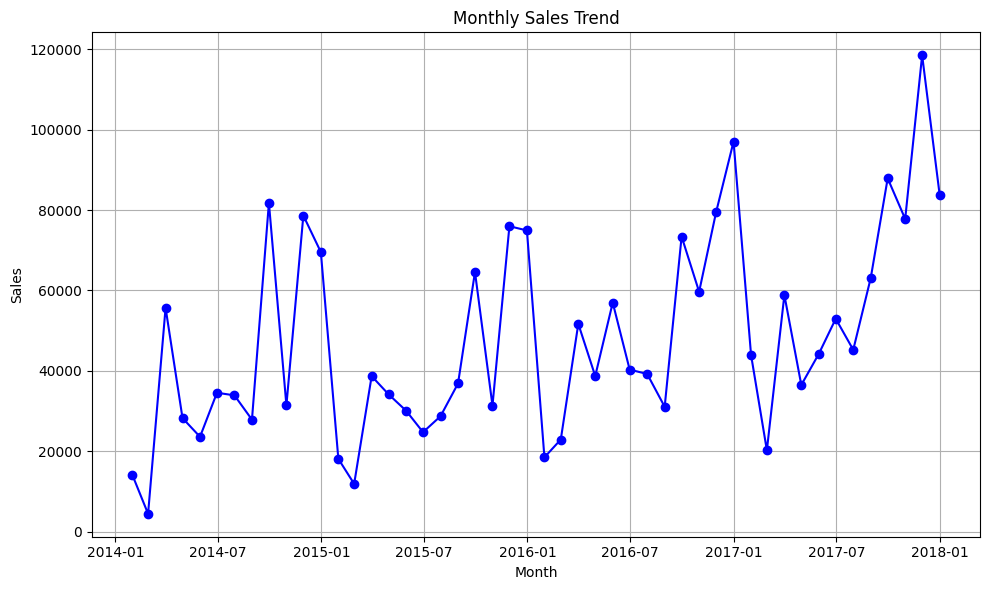

In [15]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data by month and calculate total sales for each month
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, color='blue', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 2. Bar Plot — Sales by Category
📌 Goal: Compare total sales for each product category.

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_15136\2535538905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales_df, x='Sales', y='Category', palette='viridis')


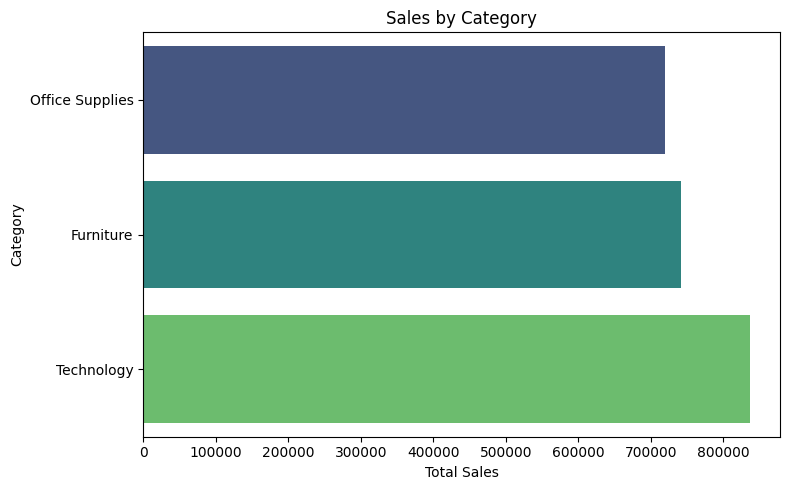

In [16]:
import seaborn as sns

# Group data and reset index so we can use seaborn properly
category_sales_df = df.groupby('Category')['Sales'].sum().sort_values().reset_index()

# Plot using seaborn - now passing dataframe columns
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales_df, x='Sales', y='Category', palette='viridis')
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



🔹 3. Histogram — Profit Distribution
📌 Goal: See how profit values are spread across all orders.

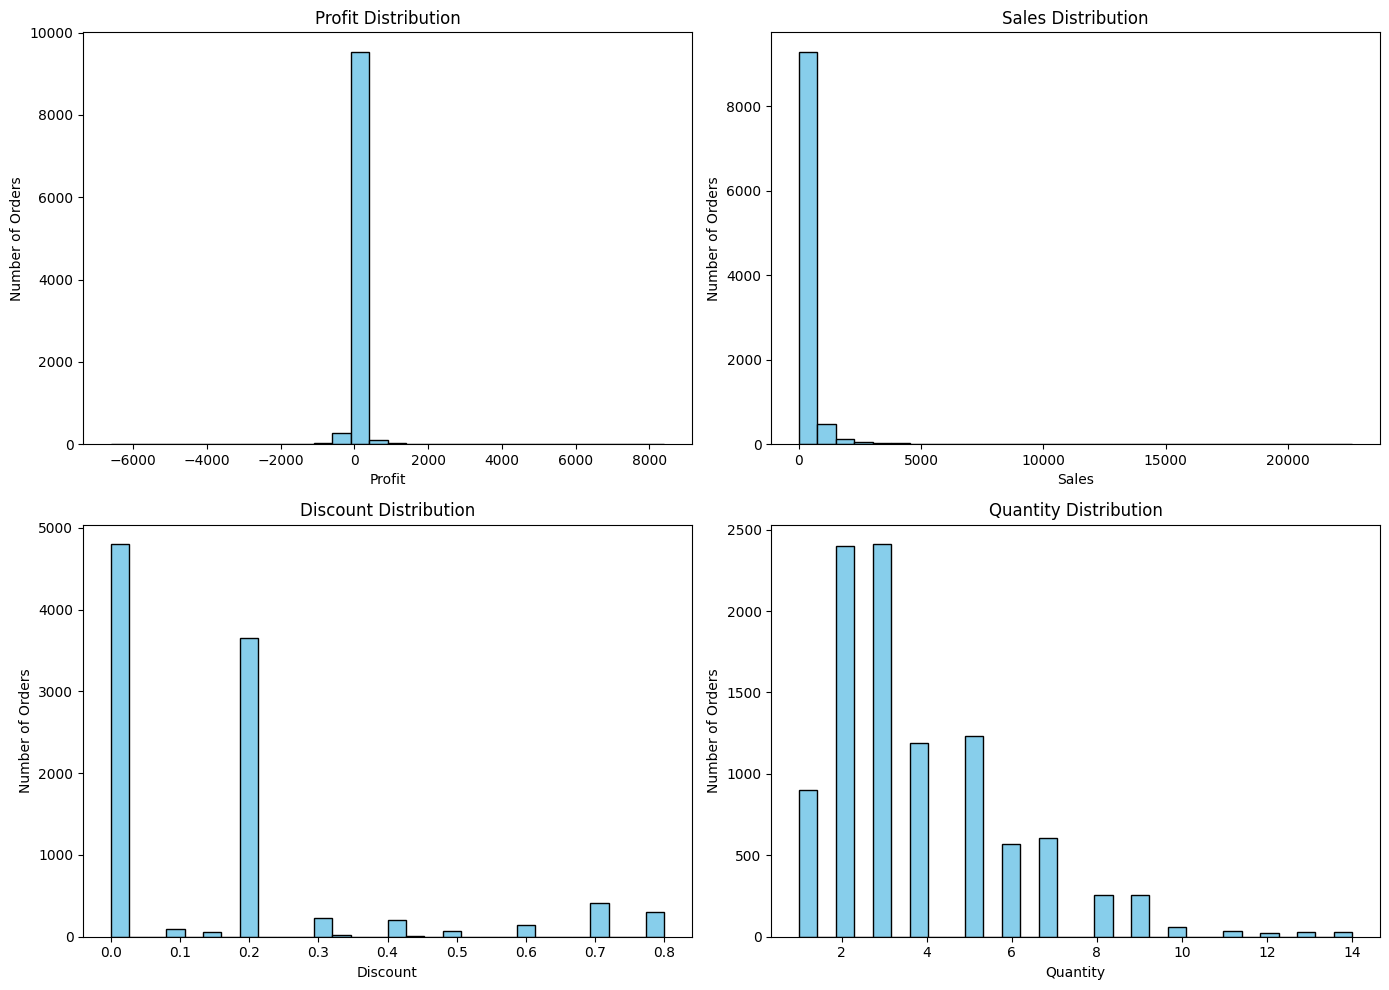

In [ ]:


# Define the numeric columns to plot
columns_to_plot = ['Profit', 'Sales', 'Discount', 'Quantity']

# Set up the subplot grid
plt.figure(figsize=(14, 10))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()


🔹 4. Box Plot — Profit by Customer Segment
📌 Goal: See profit distribution in different customer segments.

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_15136\166959243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Profit', data=df, palette='pastel')


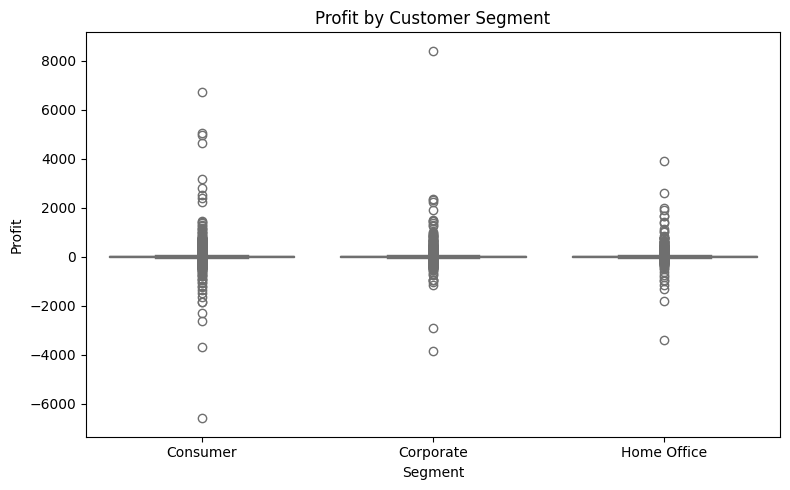

In [18]:
# Create a box plot to compare profit distribution by segment
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='Profit', data=df, palette='pastel')
plt.title("Profit by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


🔹 5. Scatter Plot — Sales vs. Profit
📌 Goal: Check the relationship between sales and profit

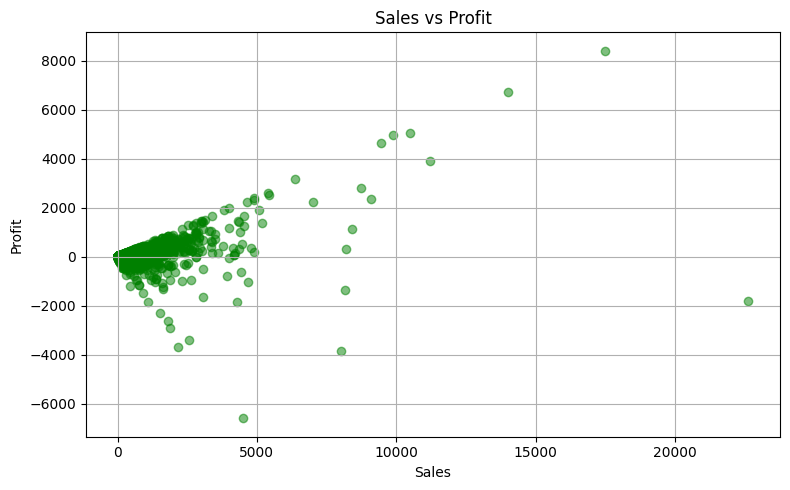

In [19]:
# Create a scatter plot for Sales vs. Profit
plt.figure(figsize=(8, 5))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5, color='green')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 6. Heatmap — Correlation Matrix
📌 Goal: Find how numerical values relate to each other.

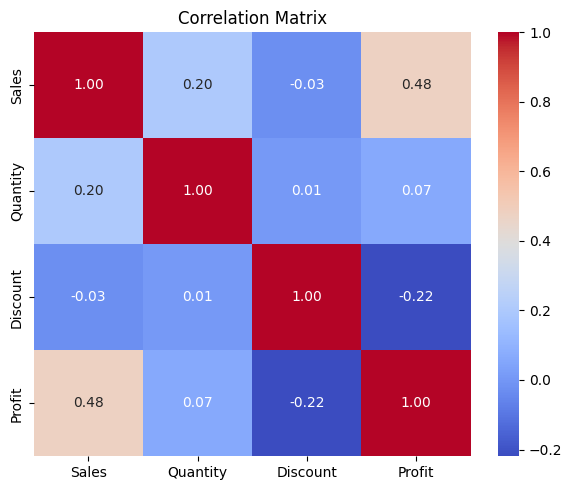

In [20]:
# Select only numerical columns
num_data = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Calculate the correlation matrix
corr = num_data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



Q: What is the distribution of key numerical features (Sales, Profit, Discount, Quantity) in the Superstore dataset?

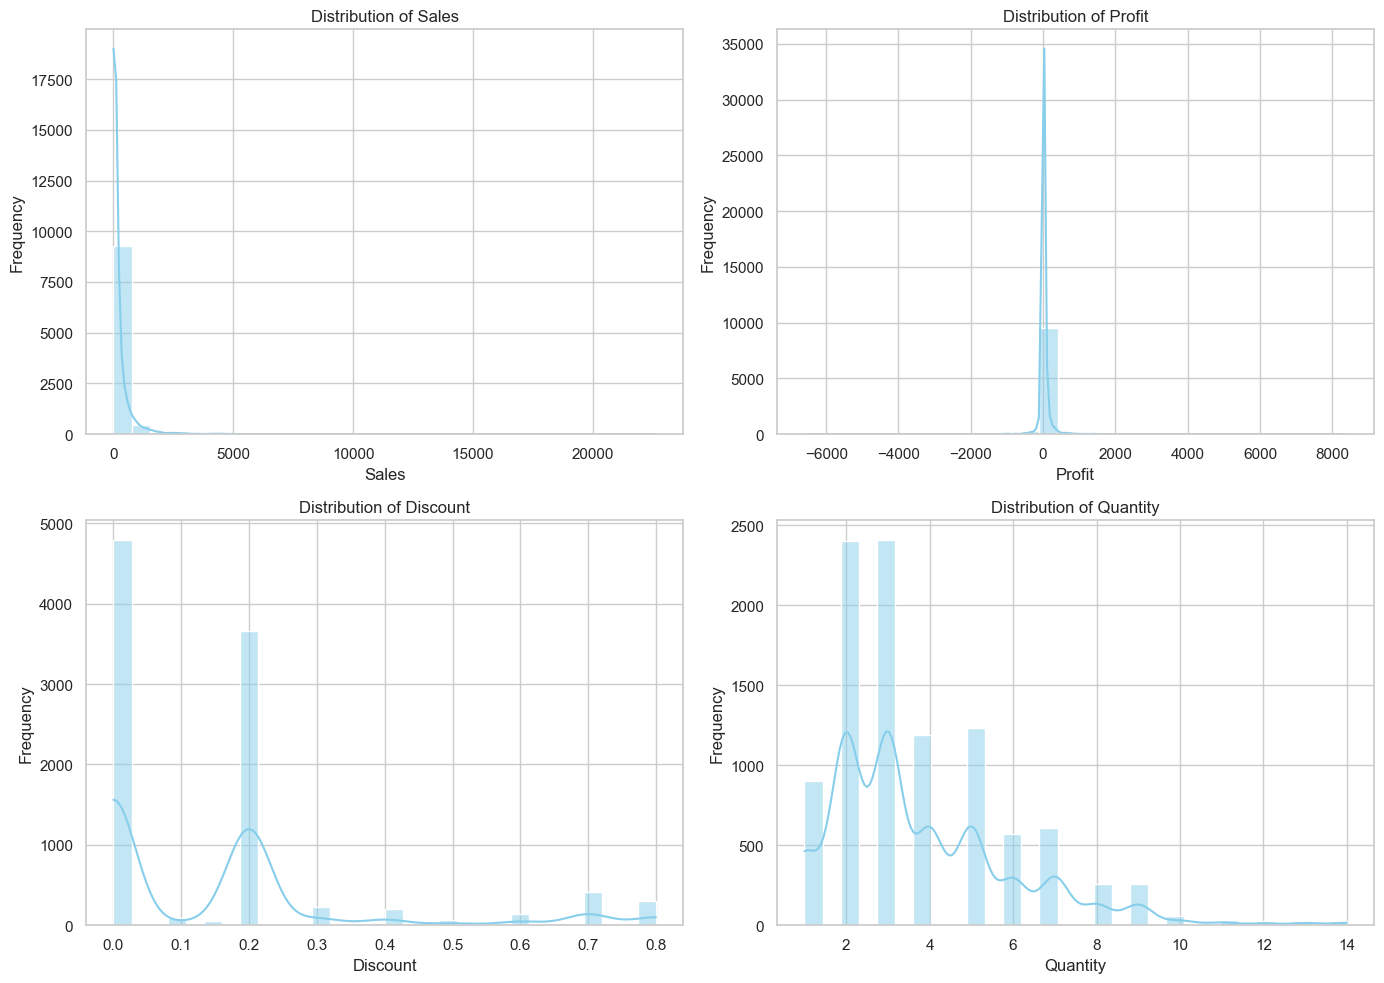

In [ ]:

# Convert necessary columns to numeric (in case they are read as strings)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

numeric_columns = ['Sales', 'Profit', 'Discount', 'Quantity']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
